# A Special Secret Santa Surprise for Francesca - Sleep Stage Classification

Ho ho ho! Merry Christmas, Francesca! 🎅 As part of your Secret Santa gift, I've prepared something a bit different from the usual chocolates and socks. This is a special report that dives deep into the world of time series classification, just for you! 🎁

## Build the dataset
The first step of the analysis is to format the data appropriately for the classification model. The time series data are provided in .dat format across multiple folders within data/mat_htcsa_3min_clean_fra. The labels associated with each file are provided in data/mat_htcsa_3min_clean_fra/combined_mat_3min_clean.txt. The objective of this section is to create a dataset as a pandas DataFrame. The DataFrame should use the .dat file names as the index, with each column representing a time step and its corresponding signal value, and a final column named 'label' containing the label for each file. At the end it is saved as a csv file to speed up the process in the next steps.

The data are not loaded on this github repository for privacy reasons.

In [11]:
# read this txt file data\mat_htcsa_3min_clean_fra\combined_mat_3min_clean.txt
import os
import pandas as pd

def read_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    return lines

labels = read_file('data/mat_htcsa_3min_clean_fra/combined_mat_3min_clean.txt')

# remove \n and split on \t, create a pandas dataframe with tow columns file and label
labels = [l.strip().split('\t') for l in labels]
labels = pd.DataFrame(labels, columns=['file', 'label'])
labels.head()

,file,label
0,220911_LCTH01_BLRec2_bt_0.dat,wake
1,220911_LCTH01_BLRec2_bt_180.dat,wake
2,220911_LCTH01_BLRec2_bt_360.dat,wake
3,220911_LCTH01_BLRec2_bt_540.dat,wake
4,220911_LCTH01_BLRec2_bt_720.dat,wake


In [2]:
from tqdm import tqdm

# read all the folders in data/mat_htcsa_3min_clean_fra inside each folder there are .dat files
folders = os.listdir('data/mat_htcsa_3min_clean_fra')
folders = [f for f in folders if os.path.isdir(os.path.join('data/mat_htcsa_3min_clean_fra', f))]

# create a list of all the files in the folders
files = []
for folder in folders:
    files += [os.path.join('data/mat_htcsa_3min_clean_fra', folder, f) for f in os.listdir(os.path.join('data/mat_htcsa_3min_clean_fra', folder)) if f.endswith('.dat')]
    
# take the first file, read it and turn it into a pandas dataframe
df_total = pd.DataFrame()
for file in tqdm(files):
    data = read_file(file)
    data = [d.strip() for d in data]
    data = pd.DataFrame(data, columns=[file.split('\\')[-1]])
    df_total = pd.concat([df_total, data], axis=1)
    
df_total = df_total.T

# in the df labels, the file names are the same as the index of the df_total,
# so we can join the two dataframes on the index
df = df_total.join(labels.set_index('file'))

# save the dataframe to a csv file
df.to_csv('data/mat_htcsa_3min_clean_fra.csv')


100%|██████████| 3016/3016 [08:48<00:00,  5.71it/s]


### Data Frame Analysis

In this step, we will analyze the DataFrame generated in the previous phase. First, we will load the CSV file and check for any missing values. If we find missing labels, it indicates that some time series data are not associated with a corresponding label. By utilizing `df.head()`, we can examine the structure of the DataFrame. Finally, we will plot four samples to visualize the distribution of the labels.

It is important to note that the dataset is unbalanced. The majority of the samples belong to the 'Wake' and 'NREM' classes, while the 'REM' class has significantly fewer samples. This imbalance can negatively impact the performance of the classification model.

#### Label Counts:
- **Wake**: 1,303 samples
- **NREM**: 1,662 samples
- **REM**: 41 samples

This disparity in sample sizes must be addressed to improve the model's classification accuracy.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('data/mat_htcsa_3min_clean_fra.csv',index_col=0)
# Check for missing values, show only columns with missing values
print("Missing values:",len(df.isnull().sum()[df.isnull().sum() > 0]))
df.dropna(subset=['label'], inplace=True)
print("--- Labels Counts --")
labels = df['label'].unique()
for label in labels:
    print(f"{label}: {len(df[df['label'] == label])}")
df.head()

Missing values: 1
--- Labels Counts --
wake: 1303
nrem: 1662
rem: 41


,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,label
220523_CI04_12hBL1_bt_0.dat,0.716439,0.641576,0.595273,0.573815,0.573360,0.590453,0.613416,0.626261,0.625324,0.610366,...,0.411467,0.415662,0.404419,0.375816,0.344396,0.318517,0.298167,0.295334,0.308983,wake
220523_CI04_12hBL1_bt_10440.dat,0.199518,0.201452,0.199523,0.198407,0.196037,0.187394,0.179855,0.178854,0.172071,0.158165,...,0.201358,0.208572,0.212316,0.200842,0.193917,0.190241,0.191672,0.194738,0.198187,nrem
220523_CI04_12hBL1_bt_1080.dat,0.150555,0.155264,0.160868,0.171830,0.204301,0.250976,0.294343,0.344366,0.395611,0.427908,...,0.162016,0.157194,0.163076,0.167951,0.172146,0.185893,0.193374,0.191409,0.188967,nrem
220523_CI04_12hBL1_bt_10800.dat,0.232179,0.241610,0.252706,0.254875,0.257945,0.258058,0.260947,0.262836,0.260651,0.254727,...,0.214475,0.206912,0.204865,0.206962,0.214545,0.228346,0.250727,0.266888,0.279556,nrem
220523_CI04_12hBL1_bt_11160.dat,0.480612,0.487772,0.483641,0.479117,0.481998,0.502795,0.535793,0.577624,0.614385,0.629912,...,0.230798,0.217290,0.206670,0.199294,0.206641,0.213038,0.223242,0.234781,0.243878,nrem


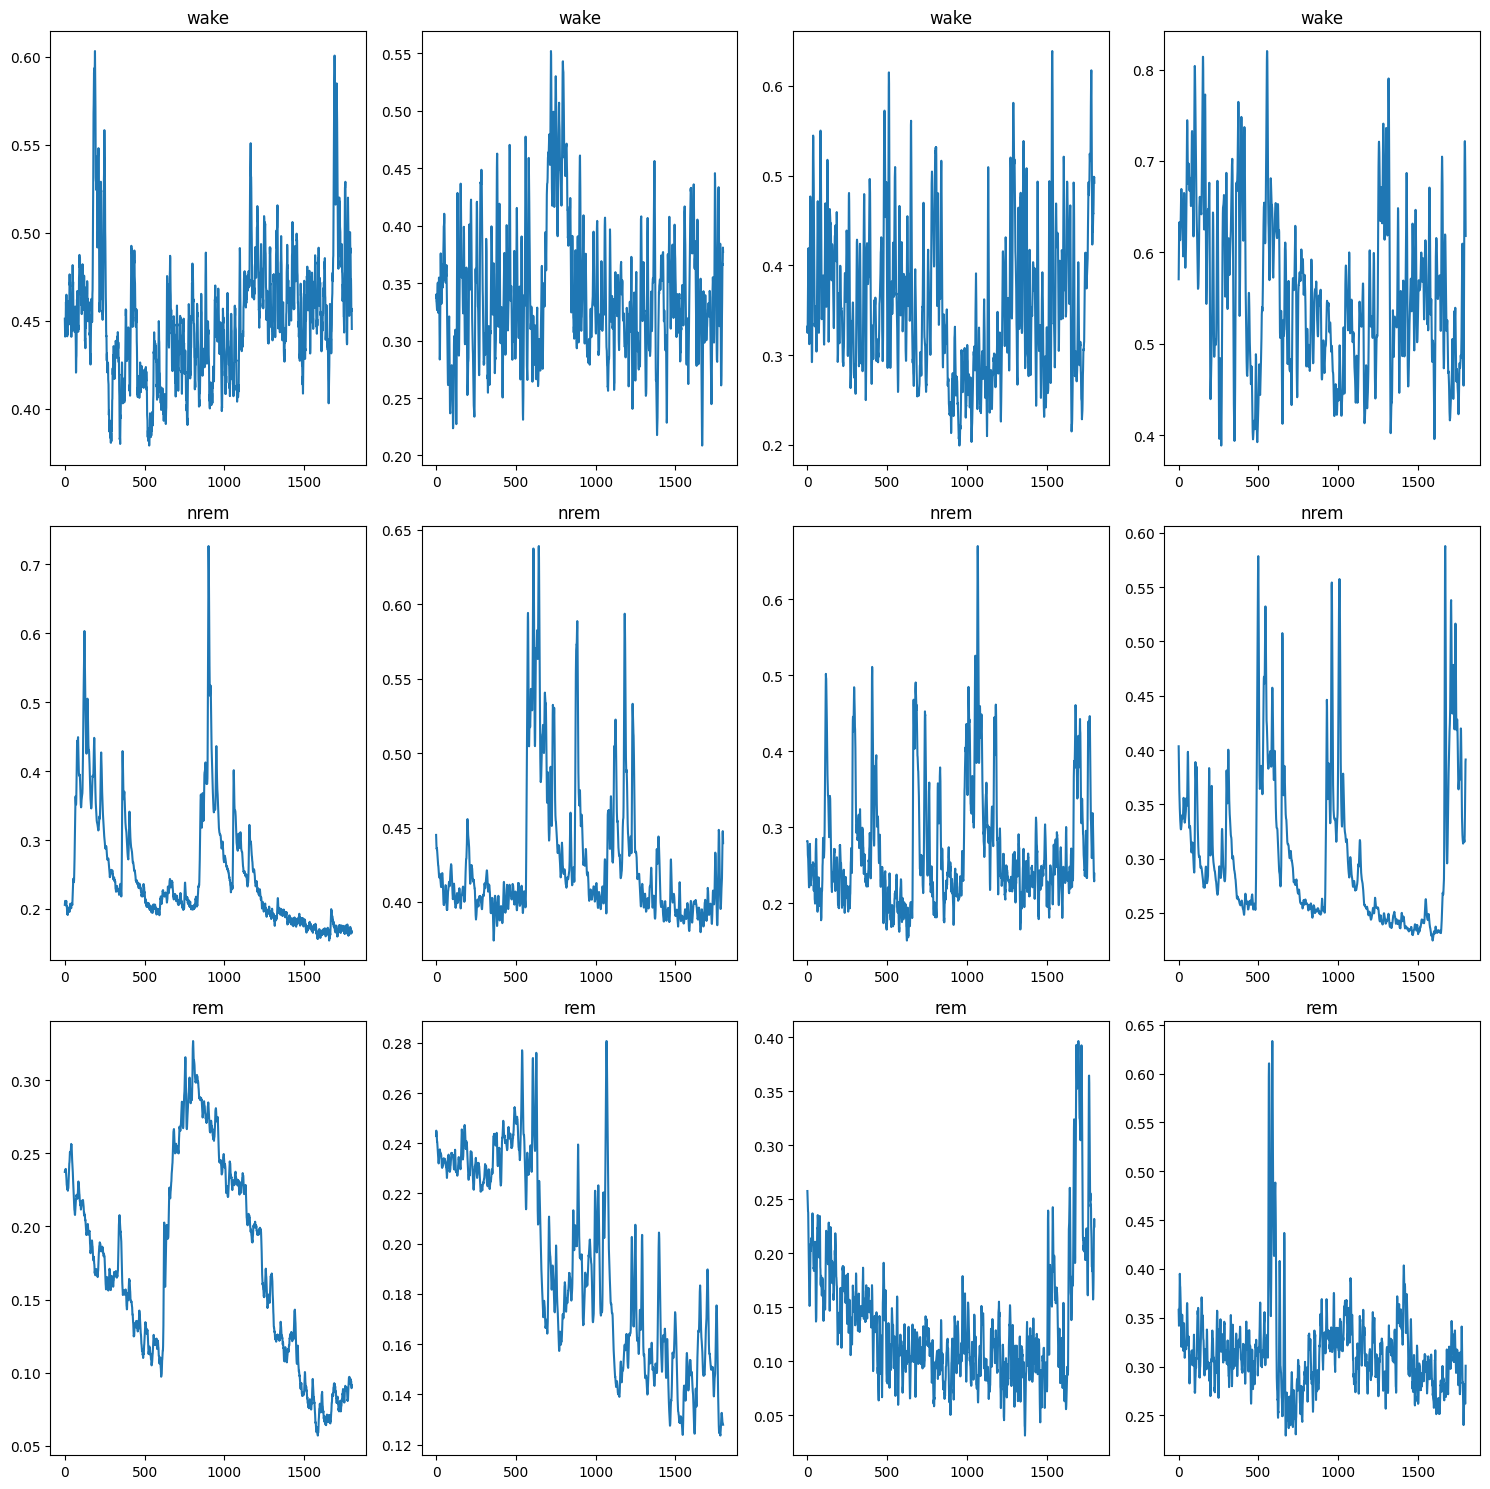

In [18]:
# sample 6 rows per category and print them in plots (one foe each label) 3 columnsx2 rows
labels = df['label'].unique()
n_rows = 4
fig, axs = plt.subplots(3, n_rows, figsize=(15, 15))
for i, label in enumerate(labels):
    data = df[df['label'] == label].sample(n_rows)
    data.drop('label', axis=1, inplace=True)
    for j in range(n_rows):
        row = data.iloc[j]
        axs[i, j].plot(row.values)
        axs[i, j ].set_title(f'{label}')
        
plt.tight_layout()
plt.show()

### Feature Engineering

In this step, we will engineer additional features from the time series data to improve the classification model's performance. The approach is to test different features and evaluate their impact on the model's performance by selecting the most important ones. Specifically, we will calculate the following features:

- **Mean**: The average value of the time series data.
- **Median**: The middle value of the time series data when sorted.
- **Standard Deviation (std_dev)**: Measures the amount of variation or dispersion in the data.
- **Skewness**: Indicates the asymmetry of the data distribution.
- **Kurtosis**: Measures the "tailedness" of the data distribution.
- **75th Percentile (75_percentile)**: The value below which 75% of the data falls.
- **FFT Mean (fft_mean)**: The average of the Fast Fourier Transform (FFT) coefficients, representing the frequency domain.
- **FFT Variance (fft_variance)**: The variance of the FFT coefficients.
- **Number of Peaks (num_peaks)**: The count of significant peaks in the time series.
- **Peak Prominences (peak_prominences)**: The height of each peak relative to its surroundings.
- **Rolling Mean (rolling_mean)**: The mean value within a moving window.
- **Rolling Standard Deviation (rolling_std_dev)**: The standard deviation within a moving window.
- **Minimum (min)**: The smallest value in the time series.
- **Maximum (max)**: The largest value in the time series.
- **Range**: The difference between the maximum and minimum values.
- **25th Percentile (25_percentile)**: The value below which 25% of the data falls.
- **Variance**: Measures the spread of the data points.
- **Mean and Standard Deviation for 100 Time Steps**: The mean and standard deviation calculated over windows of 100 time steps.

During the different evaluations, we will comment out the less important features to reduce the dimensionality of the dataset and improve the model's performance.

One consideration is that I didn't use the 7000 features file, but one custom made. Maybe by tring the same apporach with that file will improve the results.

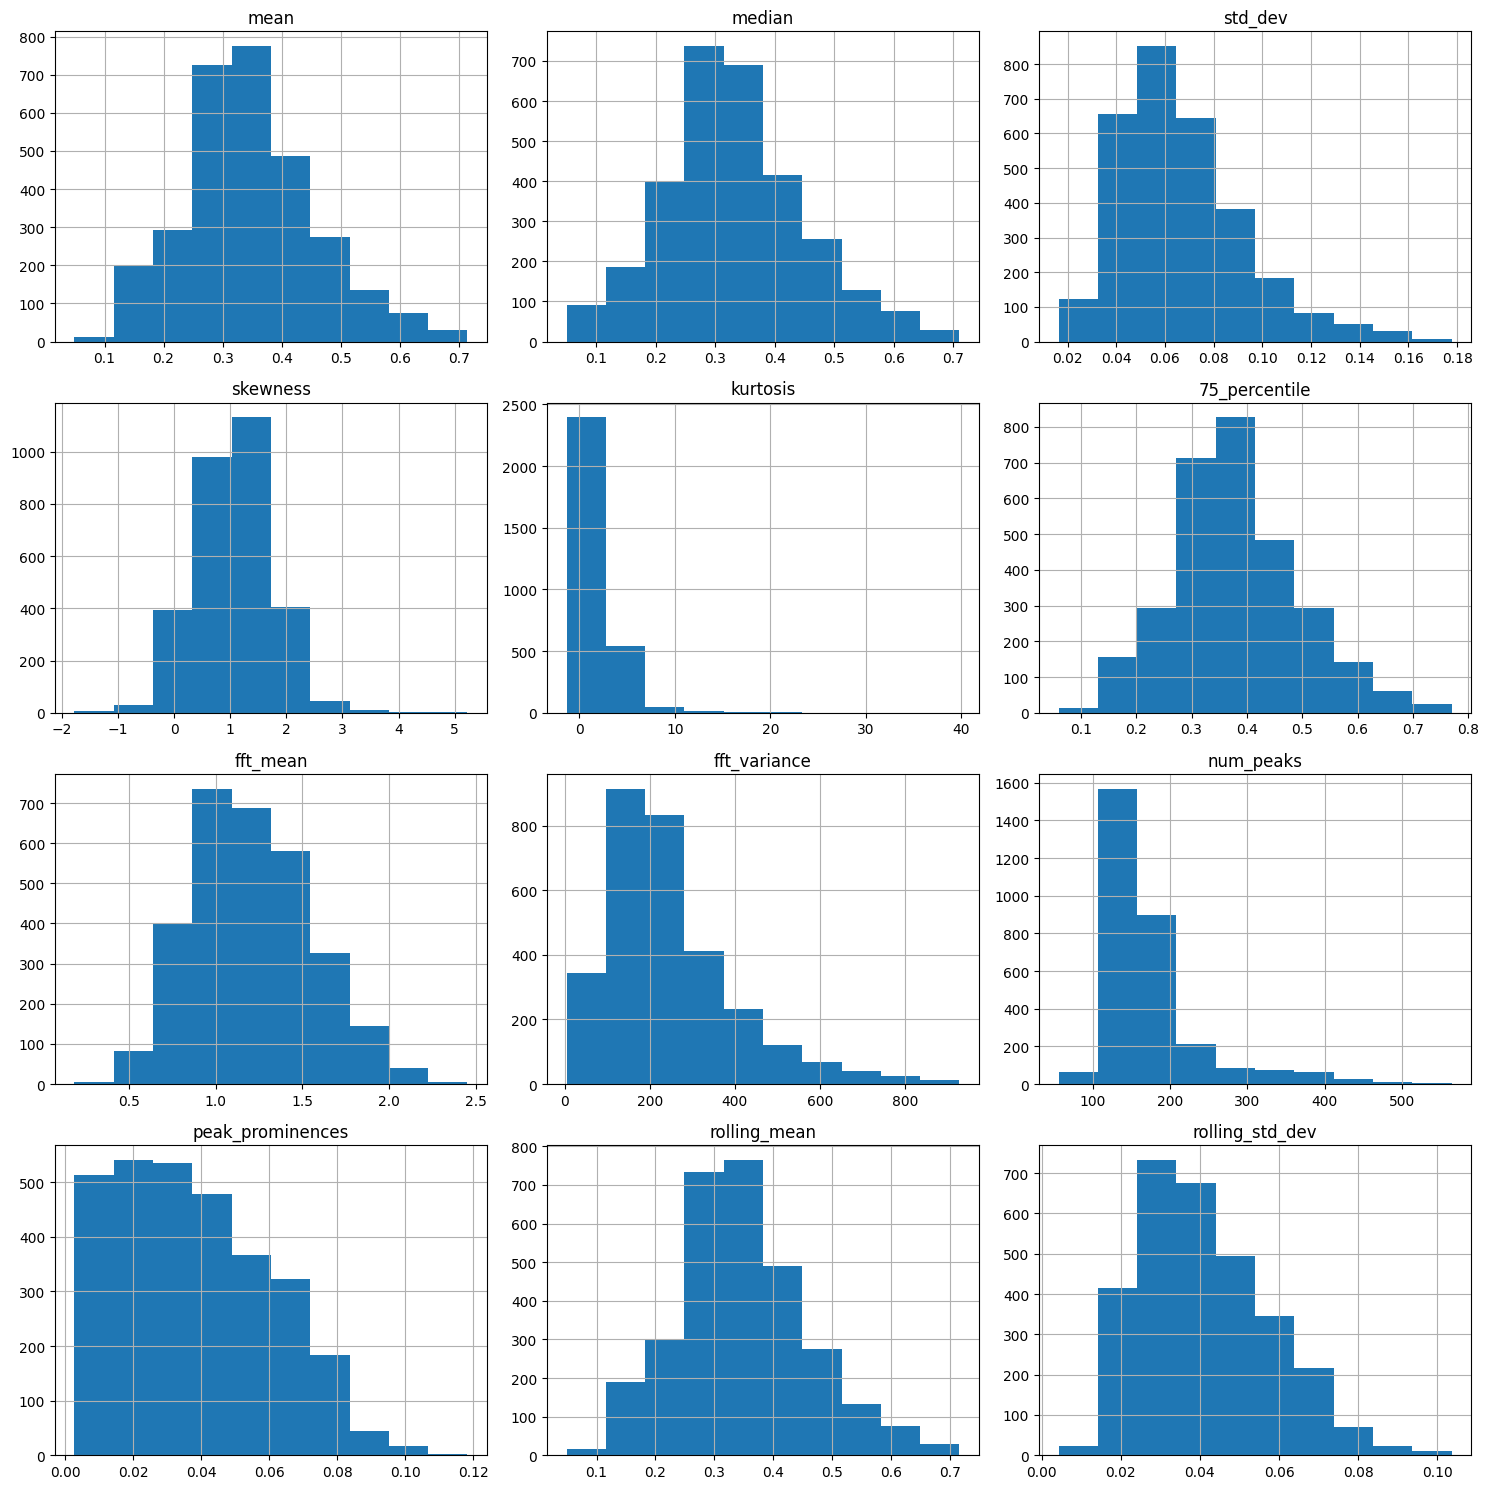

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.fft import fft
from scipy.signal import find_peaks,peak_prominences

import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


def feature_engineering(df_tmp):
    df_tmp = df.drop('label', axis=1)
    # Initialize a DataFrame to store the features
    features = pd.DataFrame()

    # Extract statistical features
    features['mean'] = df_tmp.mean(axis=1)
    features['median'] = df_tmp.median(axis=1)
    features['std_dev'] = df_tmp.std(axis=1)
    #features['variance'] = df_tmp.var(axis=1)
    features['skewness'] = df_tmp.apply(skew, axis=1)
    features['kurtosis'] = df_tmp.apply(kurtosis, axis=1)
    #features['min'] = df_tmp.min(axis=1)
    #features['max'] = df_tmp.max(axis=1)
    #features['range'] = features['max'] - features['min']
    #features['25_percentile'] = df_tmp.apply(lambda x: np.percentile(x, 25), axis=1)
    features['75_percentile'] = df_tmp.apply(lambda x: np.percentile(x, 75), axis=1)

    # Extract frequency domain features using FFT
    fft_features = np.abs(fft(df_tmp, axis=1))
    features['fft_mean'] = fft_features.mean(axis=1)
    features['fft_variance'] = fft_features.var(axis=1)

    # Extract peak features
    features['num_peaks'] = df_tmp.apply(lambda x: len(find_peaks(x)[0]), axis=1)
    features['peak_prominences'] = df_tmp.apply(lambda x: np.mean(peak_prominences(x, find_peaks(x)[0])[0]) if len(find_peaks(x)[0]) > 0 else 0, axis=1)

    # Extract rolling statistics
    window_size = 100
    features['rolling_mean'] = df_tmp.rolling(window=window_size, axis=1).mean().mean(axis=1)
    features['rolling_std_dev'] = df_tmp.rolling(window=window_size, axis=1).std().mean(axis=1)

    """
    # Extract sliding window features
    n_timepoints = df.shape[1]
    window_size = 100
    for start in range(0, n_timepoints, window_size):
        end = start + window_size
        window_data = df_tmp.iloc[:, start:end]
        features[f'window_{start}_{end}_mean'] = window_data.mean(axis=1)
        features[f'window_{start}_{end}_variance'] = window_data.var(axis=1)
    """
    return features


# Feature Engineering
df=pd.read_csv('data/mat_htcsa_3min_clean_fra.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(subset=['label'], inplace=True)
features = feature_engineering(df)

#plot the features
features.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


### Model Selection

The model used is the XGBoost classifier wrapped in a OneVsRestClassifier to handle the multiclass classification problem. XGBoost is an ensemble learning method known for its effectiveness in classification tasks. The model is trained on the engineered features and evaluated using train and test sets (80% train, 20% test). The performance metrics used to evaluate the model are accuracy, precision, recall, and F1 score. The trained model is then saved for future use.

In this section, we will:

1. **Train the Model**: Train the model using the engineered features.
2. **Evaluate Performance**: Evaluate the model's performance using a confusion matrix and calculate performance metrics.
3. **Analyze Feature Importance**: Assess the importance of each feature used in the model.

#### Performance Evaluation

The confusion matrix highlights that the precision and recall for the "wake" and "NREM" stages are quite high, whereas the "REM" stage performance is not as good. This discrepancy is caused by the unbalanced dataset, where the "REM" stage has fewer samples compared to the other two stages.

#### Feature Importance

The most important features identified by the model are:

| Feature            | Importance |
|--------------------|------------|
| Skewness           | 0.378   |
| Median             | 0.151   |
| Peak Prominences   | 0.085   |
| Standard Deviation | 0.059   |

It is worth analyzing these features in detail to understand why they are crucial for the model:

- **Skewness**: Measures the asymmetry of the data distribution. 
- **Median**: Represents the central value of the data, providing a robust measure of central tendency that helps in distinguishing different stages.
- **Peak Prominences**: Indicates the height of peaks relative to their surroundings, which can identify significant events or transitions between sleep stages.
- **Standard Deviation**: Measures the variability within the data, indicating how spread out the values are, which is essential for differentiating between stages with different levels of activity or rest.


X_train shape: (2404, 12)
X_test shape: (602, 12)
y_train shape: (2404,)
y_test shape: (602,)
Test accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       245
           1       0.96      0.98      0.97       348
           2       1.00      0.44      0.62         9

    accuracy                           0.96       602
   macro avg       0.97      0.79      0.85       602
weighted avg       0.96      0.96      0.96       602

Most important features:
             Feature  Importance
3           skewness    0.378862
1             median    0.151743
9   peak_prominences    0.085896
2            std_dev    0.059505
6           fft_mean    0.058269
0               mean    0.053060
8          num_peaks    0.053049
11   rolling_std_dev    0.040527
4           kurtosis    0.035813
7       fft_variance    0.029956


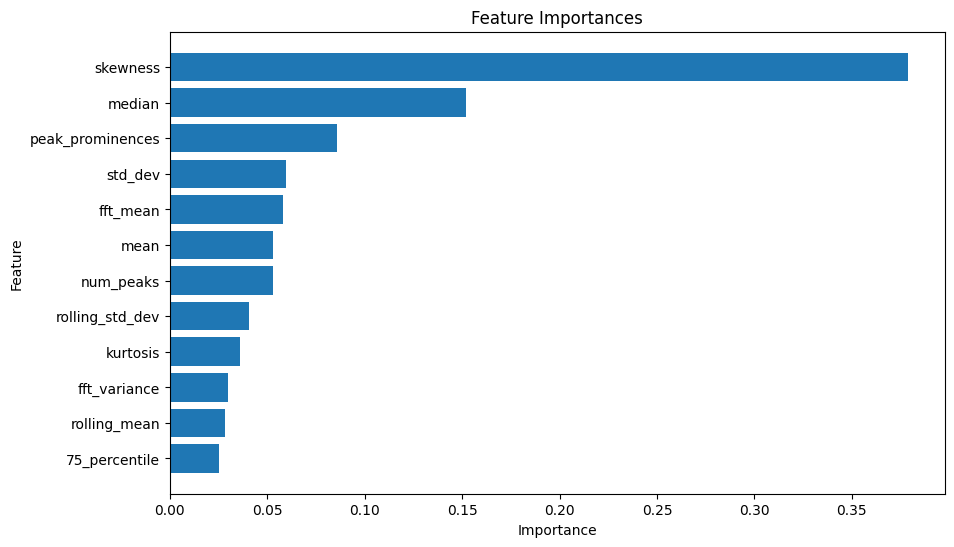

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'features' is your DataFrame with extracted features
# and 'labels' is a Series or array with the corresponding labels
labels = df["label"]
# Transform label to 0 if wake, 1 if nrem, or 2 if rem
labels = labels.apply(lambda x: 0 if x == "wake" else 1 if x == "nrem" else 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the XGBoost classifier wrapped in OneVsRestClassifier for multi-label classification
clf = OneVsRestClassifier(xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, verbosity=2))

# Train the classifier
clf.fit(X_train, y_train)

# save the model
import joblib
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
joblib.dump(clf, f'model/xgb_model_{today}.pkl')

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Extract feature importances
feature_importances = clf.estimators_[0].feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Most important features:")
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### Hyperparameter Tuning

Hyperparameter tuning is a crucial step to optimize the model's performance. The hyperparameters of the XGBoost classifier are tuned using RandomizedSearchCV to find the optimal combination that maximizes the model's performance. The hyperparameters tuned include the learning rate, maximum depth of the trees, number of estimators, and subsample ratio. The best hyperparameters are then used to train the final model, which is evaluated using the same performance metrics as before.

The random search for hyperparameters resulted in the following optimal values:
```
Best parameters found:  
{
  'estimator__colsample_bytree': 0.8829989973347863,
  'estimator__learning_rate': 0.17663898234723288,
  'estimator__max_depth': 5,
  'estimator__n_estimators': 255,
  'estimator__subsample': 0.8173181822719722
}
```

Although hyperparameter tuning can be time-consuming, it is essential to ensure that the model is well-optimized and performs at its best.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming 'features' is your DataFrame with extracted features
# and 'labels' is a Series or array with the corresponding labels
labels = df["label"]
# Transform label to 0 if wake, 1 if nrem, or 2 if rem
labels = labels.apply(lambda x: 0 if x == "wake" else 1 if x == "nrem" else 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the XGBoost classifier wrapped in OneVsRestClassifier for multi-label classification
clf = OneVsRestClassifier(xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False))

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'estimator__n_estimators': randint(50, 300),
    'estimator__max_depth': randint(3, 10),
    'estimator__learning_rate': uniform(0.01, 0.2),
    'estimator__subsample': uniform(0.7, 0.3),
    'estimator__colsample_bytree': uniform(0.7, 0.3)
}

# Perform randomized search with verbosity
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV Best parameters found:  {'estimator__colsample_bytree': 0.8829989973347863, 'estimator__learning_rate': 0.17663898234723288, 'estimator__max_depth': 5, 'estimator__n_estimators': 255, 'estimator__subsample': 0.8173181822719722}
print("Best parameters found: ", random_search.best_params_)

# Train the classifier with the best parameters
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best parameters: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

### Approaches and Results

1. **Using Raw Time Series Data**: Without feature engineering, the model achieved an accuracy of 0.88.
2. **Using Engineered Features**: With the features described above, the accuracy improved to 0.94.
3. **Feature Reduction**: After analyzing feature importance, less important features were commented out, resulting in an accuracy of 0.96. To reuse these features, simply uncomment them.
4. **Hyperparameter Tuning**: With optimized hyperparameters, the accuracy remained at 0.96.

This systematic approach of feature engineering, model selection, and hyperparameter tuning ensures the development of a robust classification model.

## Using the Model

In this section, we will utilize the trained model to classify new time series data. The model is loaded from the saved file, and the new data is preprocessed to extract the engineered features. The model provides two primary functions for making predictions:

- `clf.predict(X)`: Predicts the labels for the new data.
- `clf.predict_proba(X)`: Predicts the probabilities for each label, which can be useful for understanding the model's confidence in its predictions.

For semplicity, the new data are the same data from the training set fromtted as described above, then applied the fetaure engineering and finally the model is used to predict the labels.

In [24]:
# use xgboost to predict time series with th score
import numpy as np
import pandas as pd

# Feature Engineering
df=pd.read_csv('data/mat_htcsa_3min_clean_fra.csv',index_col=0).iloc[:100]
df.dropna(subset=['label'], inplace=True)
features = feature_engineering(df)

clf = joblib.load('model/xgb_model_2024-12-14.pkl')

# Make predictions
predictions = clf.predict(features)

# Get the probability estimates
probabilities = clf.predict_proba(features)
# round the probabilities to 2 decimal places
probabilities = np.round(probabilities, 2)

result = pd.DataFrame([predictions, *probabilities.T,df["label"],df.index], index=['Prediction', 'Wake', 'NREM', 'REM','label','index']).T
result["Prediction"] = result["Prediction"].apply(lambda x: "wake" if x == 0 else "nrem" if x == 1 else "rem")
result.head()

,Prediction,Wake,NREM,REM,label,index
0,wake,1.0,0.0,0.0,wake,220523_CI04_12hBL1_bt_0.dat
1,nrem,0.0,1.0,0.0,nrem,220523_CI04_12hBL1_bt_10440.dat
2,nrem,0.0,1.0,0.0,nrem,220523_CI04_12hBL1_bt_1080.dat
3,nrem,0.0,1.0,0.0,nrem,220523_CI04_12hBL1_bt_10800.dat
4,nrem,0.0,1.0,0.0,nrem,220523_CI04_12hBL1_bt_11160.dat
